In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
from sklearn.tree import convert_to_graphviz
import graphviz



%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

ImportError: cannot import name 'convert_to_graphviz' from 'sklearn.tree' (c:\users\flaquitqm\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\__init__.py)

In [2]:
iris = datasets.load_iris()
#Transformando a un dataframe de pandas
datos = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Cambiandole los nombres a las columnas
datos.columns=["Sepal.length","Sepal.width","Petal.length","Petal.width","Specie"]
datos

,Sepal.length,Sepal.width,Petal.length,Petal.width,Specie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


## Saber cuantas filas hay de cada categoría

In [3]:
datos.groupby('Specie').size()

Specie
0.0    50
1.0    50
2.0    50
dtype: int64

### Es importante saber que está balanceado el conjunto de datos en la variable de la respuesta

In [4]:
datos['Specie'] = datos['Specie'].astype('category')

In [5]:

y = datos.pop("Specie") #La variable respuesta
X = datos #El resto de los datos

random.seed(123)




# Estableciendo los conjuntos de Entrenamiento y Prueba

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

70% de entrenamiento y 30% prueba

In [19]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

[Text(334.8, 440.31600000000003, 'Petal.length <= 2.45\nentropy = 0.66\nsamples = 105\nvalue = [28, 38, 39]\nclass = 2'),
 Text(251.10000000000002, 342.468, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0, 0]\nclass = 0'),
 Text(418.5, 342.468, 'Petal.length <= 4.85\nentropy = 0.5\nsamples = 77\nvalue = [0, 38, 39]\nclass = 2'),
 Text(167.4, 244.62, 'Petal.width <= 1.65\nentropy = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = 1'),
 Text(83.7, 146.772, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = 1'),
 Text(251.10000000000002, 146.772, 'Sepal.width <= 3.1\nentropy = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = 2'),
 Text(167.4, 48.924000000000035, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 2'),
 Text(334.8, 48.924000000000035, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(669.6, 244.62, 'Petal.width <= 1.75\nentropy = 0.139\nsamples = 40\nvalue = [0, 3, 37]\nclass = 2'),
 Text(585.9, 146.772, 'Petal.length <= 5.35\nentropy = 0.49\nsamples

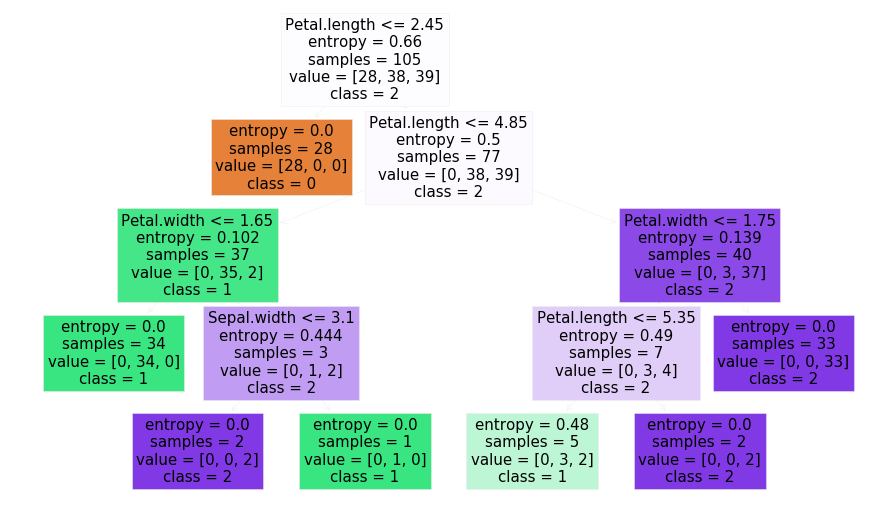

In [16]:
tree.plot_tree(arbol,feature_names=datos.columns,
               class_names=['0','1','2'],filled=True )

In [20]:
y_pred = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall:  1.0
